# Problem Statement for Laptop Price Prediction
The problem statement is that if any user wants to buy a laptop then our model should be compatible to provide a tentative price of laptop according to the user configurations. Although it looks like a simple project or just developing a model, the dataset we have is noisy and needs lots of feature engineering, and preprocessing that will drive interest in finding the best model.


# About Dataset
Context:
A dataset for 1300 laptop models.

Content:
Company Name,
Product Name,
Laptop Type,
Screen Inches,
Screen Resolution,
CPU Model,
RAM Characteristics,
Memory,
GPU Characteristics,
Operating System,
Laptop's Weight,
Laptop's Price


The first step is to import the libraries and load data. After that we will take a basic understanding of data like its shape, sample, is there are any NULL values present in the dataset. Understanding the data is an important step for prediction or any machine learning project.

# import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# import the data set of laptop price prediction

In [3]:
import io
%cd "C:/Users/najiaha urooj/Desktop/New folder"

[WinError 2] The system cannot find the file specified: 'C:/Users/najiaha urooj/Desktop/New folder'
C:\Users\najiaha urooj\Desktop\Regression project


In [4]:
dataset = pd.read_csv('laptops.csv',encoding='latin-1')

# Descriptive Statistics

In [5]:
dataset.shape

(1303, 13)

In [6]:
dataset = pd.DataFrame(dataset)

In [7]:
print("The first 5 rows of the dataset are:")
dataset.head()

The first 5 rows of the dataset are:


,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [9]:
dataset.columns

Index(['Unnamed: 0', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

Most of the columns in a dataset are noisy and contain lots of information. But with feature engineering you do, you will get more good results. The only problem is we are having less data but we will obtain a good accuracy over it. The only good thing is it is better to have a large data. we will develop a website that could predict a tentative price of a laptop based on user configuration.

In [10]:
# Checking if the dataset has any missing values
dataset.isnull().sum()

Unnamed: 0          0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

It is good that there are no NULL values.  

In [11]:
dataset.drop(columns=['Unnamed: 0','Product'],inplace=True) #deleting unwanted columns

# Exploratory data analysis

EDA of Laptop Price Prediction Dataset. Exploratory analysis is a process to explore and understand the data and data relationship in a complete depth so that it makes feature engineering and machine learning modeling steps smooth and streamlined for prediction. EDA involves Univariate, Bivariate, or Multivariate analysis. EDA helps to prove our assumptions true or false. In other words, it helps to perform hypothesis testing. We will start from the first column and explore each column and understand what impact it creates on the target column. At the required step, we will also perform preprocessing and feature engineering tasks. our aim in performing in-depth EDA is to prepare and clean data for better machine learning modeling to achieve high performance and generalized models. so let’s get started with analyzing and preparing the dataset for prediction

In [12]:
dataset.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


we need little changes in weight and Ram column to convert them to numeric by removing the unit written after value. So we will perform data cleaning here to get the correct types of columns.

In [13]:
dataset['Ram'] = dataset['Ram'].str.replace('GB','')
dataset['Weight'] = dataset['Weight'].str.replace('kg','')

In [14]:
dataset.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [15]:
dataset['Ram'] = dataset['Ram'].astype('int32')
dataset['Weight'] = dataset['Weight'].astype('float32')

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price_euros       1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [17]:
import seaborn as sns

# #Company column

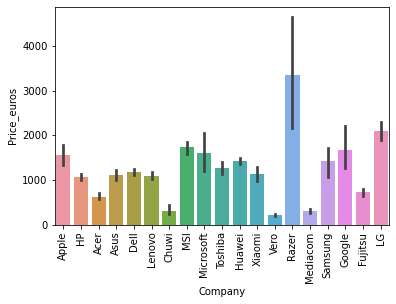

In [18]:
# the company relationship with price .

sns.barplot(x=dataset['Company'],y=dataset['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

Razer, Apple, LG, Microsoft, Google, MSI laptops are expensive, and others are in the budget range.

# #Type of laptop

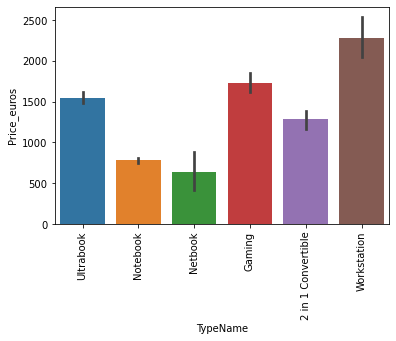

In [19]:

#Which type of laptop you are looking for like a gaming laptop, workstation, or notebook. As major people prefer
#notebook because it is under budget range and the same can be concluded from our data.

sns.barplot(x=dataset['TypeName'],y=dataset['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

# #Inches

<AxesSubplot:xlabel='Inches', ylabel='Price_euros'>

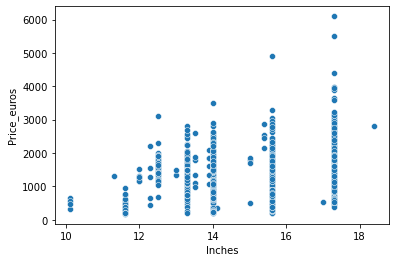

In [20]:
# the price relation with laptop size in inches?
#A Scatter plot is used when both the columns are numerical and it answers our question in a better way.  

sns.scatterplot(x=dataset['Inches'],y=dataset['Price_euros'])

we can conclude that there is a relationship but not a strong relationship between the price and size column.

# Feature Engineering and Preprocessing of Laptop Price Prediction Model

Feature engineering is a process to convert raw data to meaningful information. there are many methods that come under feature engineering like transformation, categorical encoding, etc. Now the columns we have are noisy so we need to perform some feature engineering steps

# #ScreenResolution

In [21]:
dataset['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

Screen Resolution
screen resolution contains lots of information. before any analysis first, we need to perform feature engineering over it. If you observe unique values of the column then we can see that all value gives information related to the presence of an IPS panel, are a laptop touch screen or not, and the X-axis and Y-axis screen resolution. So, we will extract the column into 3 new columns in the dataset.

# #Touchscreen

In [22]:
#Touch screen information

#It is a binary variable so we can encode it as 0 and 1. 
#one means the laptop is a touch screen and zero indicates not a touch screen.
dataset['Touchscreen'] = dataset['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [23]:
dataset['Touchscreen']

0       0
1       0
2       0
3       0
4       0
       ..
1298    1
1299    1
1300    0
1301    0
1302    0
Name: Touchscreen, Length: 1303, dtype: int64

In [24]:
dataset.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0


In [25]:
dataset.tail()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.0,1
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.0,1
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.0,0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.0,0
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,369.0,0


<AxesSubplot:>

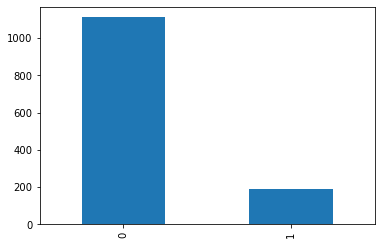

In [26]:
dataset['Touchscreen'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Touchscreen', ylabel='Price_euros'>

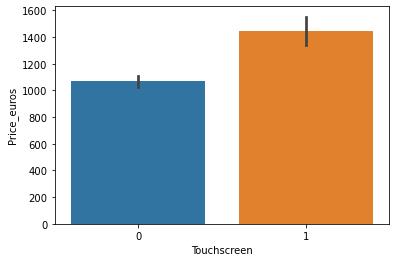

In [27]:
sns.barplot(x=dataset['Touchscreen'],y=dataset['Price_euros'])

If we plot the touch screen column against price then laptops with touch screens are expensive which is true in real life.

In [28]:
#Extract IPS Channel presence information

#It is a binary variable and the code is the same we used above. The laptops with IPS channel 
#are present less in our data but by observing relationship against the price of IPS channel laptops are high.

In [29]:
dataset['IPS'] = dataset['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [30]:
dataset.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1


<AxesSubplot:>

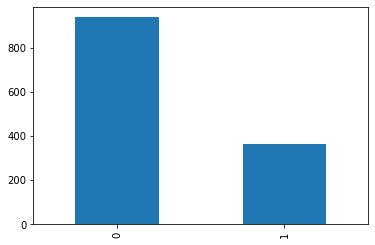

In [31]:
dataset['IPS'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='IPS', ylabel='Price_euros'>

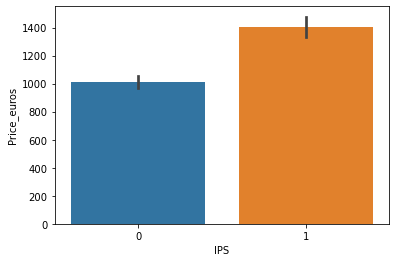

In [32]:
sns.barplot(x=dataset['IPS'],y=dataset['Price_euros'])

In [33]:
newdataset = dataset['ScreenResolution'].str.split('x',n=1,expand=True)

In [34]:
newdataset

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [35]:
#Extract X-axis and Y-axis screen resolution dimensions

In [36]:
dataset['X_res'] = newdataset[0]
dataset['Y_res'] = newdataset[1]

In [37]:
dataset.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,X_res,Y_res
164,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,1TB HDD,Intel HD Graphics 500,Windows 10,2.10,348.0,0,0,1366,768
96,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R5 M430,Linux,2.20,599.9,0,0,Full HD 1920,1080
108,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.20,1299.0,0,0,Full HD 1920,1080
813,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce GT 940MX,Windows 10,1.98,961.0,0,0,Full HD 1920,1080
760,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.50,1048.0,0,1,IPS Panel Full HD 1920,1080


In [38]:
dataset['X_res'] = dataset['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [39]:
dataset['X_res']

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: X_res, Length: 1303, dtype: object

In [40]:
dataset.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600


In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price_euros       1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


In [42]:
dataset['X_res'] = dataset['X_res'].astype('int')
dataset['Y_res'] = dataset['Y_res'].astype('int')

In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price_euros       1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [44]:
dataset.corr()['Price_euros']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_euros    1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price_euros, dtype: float64

Replacing inches, X and Y resolution to PPI

If you find the correlation of columns with price using the corr method then we can see that inches do not have a strong correlation but X and Y-axis resolution have a very strong resolution so we can take advantage of it and convert these three columns to a single column that is known as Pixel per inches(PPI). In the end, our goal is to improve the performance by having fewer features.

In [45]:
dataset['Ppi'] = ((dataset['X_res']**2) + (dataset['Y_res']**2))**0.5/dataset['Inches'].astype('float')

In [46]:
dataset.corr()['Price_euros']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_euros    1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Ppi            0.473487
Name: Price_euros, dtype: float64

In [47]:
#So now we can drop the extra columns which are not of use.
dataset.drop(columns=['ScreenResolution','X_res','Y_res','Inches'],inplace = True)

In [48]:
dataset.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,Ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005


# #CPU column

In [49]:
dataset['Cpu'].value_counts()
#The information it gives is about preprocessors in laptops and speed.

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [50]:
dataset['Cpu_name'] = dataset['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [51]:
dataset.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,Ppi,Cpu_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5


To extract the preprocessor we need to extract the first three words from the string. we are having an Intel preprocessor and AMD preprocessor so we are keeping 5 categories in our dataset as i3, i5, i7,
other intel processors, and AMD processors

In [52]:
def fetch_processor(text):
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other intel processor'
        else:
            return 'AMD processor'
      


In [53]:
dataset['Cpu_brand'] = dataset['Cpu_name'].apply(fetch_processor)

In [54]:
dataset.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,Ppi,Cpu_name,Cpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,Intel Core i5


<AxesSubplot:>

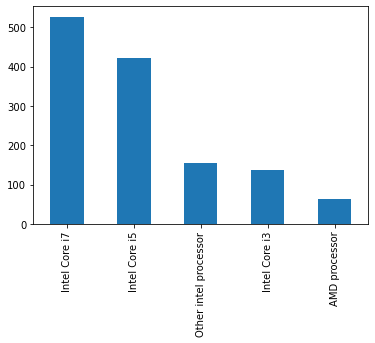

In [55]:
dataset['Cpu_brand'].value_counts().plot(kind ='bar')

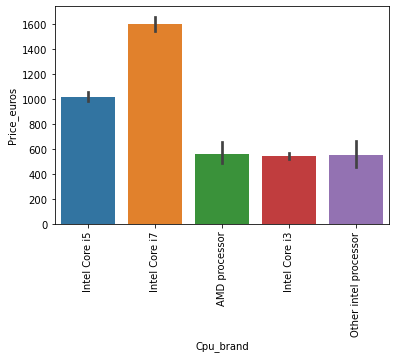

In [56]:
sns.barplot(x=dataset['Cpu_brand'],y=dataset['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [57]:
dataset.drop(columns=['Cpu_name','Cpu'],inplace = True)

In [58]:
dataset.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,Ppi,Cpu_brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5


<AxesSubplot:>

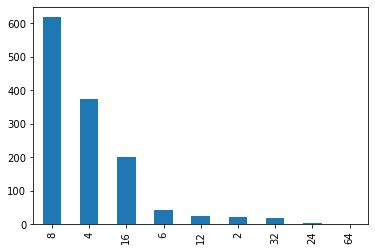

In [59]:
#Price relation with Ram
dataset['Ram'].value_counts().plot(kind = 'bar')
#If you observe the plot then Price is having a very strong positive correlation with Ram or you can say a linear relationship.

In [60]:
# Memory column
dataset['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

Memory column is again a noisy column that gives an understanding of hard drives. many laptops came with HHD and SSD both, as well in some there is an external slot present to insert after purchase. This column can disturb your analysis if not feature engineer it properly. So 
If you use value counts on a column then we are having 4 different categories of memory as HHD, SSD, Flash storage, and hybrid.



In [61]:
dataset['Memory'] = dataset['Memory'].astype(str).replace('\.0', '', regex=True)
dataset["Memory"] = dataset["Memory"].str.replace('GB', '')
dataset["Memory"] = dataset["Memory"].str.replace('TB', '000')
newdataset = dataset["Memory"].str.split("+", n = 1, expand = True)
dataset["first"]= newdataset[0]
dataset["first"]=dataset["first"].str.strip()
dataset["second"]= newdataset[1]
dataset["Layer1HDD"] = dataset["first"].apply(lambda x: 1 if "HDD" in x else 0)
dataset["Layer1SSD"] = dataset["first"].apply(lambda x: 1 if "SSD" in x else 0)
dataset["Layer1Hybrid"] = dataset["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
dataset["Layer1Flash_Storage"] = dataset["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
dataset["first"] = dataset["first"].str.replace(r'\D', '')
dataset["second"].fillna("0", inplace = True)


C:\Users\najiaha urooj\AppData\Local\Temp\ipykernel_20128\3357372696.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset["first"] = dataset["first"].str.replace(r'\D', '')


In [62]:
#binary encoding
dataset["Layer2HDD"] = dataset["second"].apply(lambda x: 1 if "HDD" in x else 0)
dataset["Layer2SSD"] = dataset["second"].apply(lambda x: 1 if "SSD" in x else 0)
dataset["Layer2Hybrid"] = dataset["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
dataset["Layer2Flash_Storage"] = dataset["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [63]:
#only keep integers
dataset['second'] = dataset['second'].str.replace(r'\D', '')

C:\Users\najiaha urooj\AppData\Local\Temp\ipykernel_20128\175817344.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['second'] = dataset['second'].str.replace(r'\D', '')


In [64]:
#convert to numeric
dataset["first"] = dataset["first"].astype(int)
dataset["second"] = dataset["second"].astype(int)

In [65]:
#finalize the columns by keeping value
dataset["HDD"]=(dataset["first"]*dataset["Layer1HDD"]+dataset["second"]*dataset["Layer2HDD"])
dataset["SSD"]=(dataset["first"]*dataset["Layer1SSD"]+dataset["second"]*dataset["Layer2SSD"])
dataset["Hybrid"]=(dataset["first"]*dataset["Layer1Hybrid"]+dataset["second"]*dataset["Layer2Hybrid"])
dataset["Flash_Storage"]=(dataset["first"]*dataset["Layer1Flash_Storage"]+dataset["second"]*dataset["Layer2Flash_Storage"])


In [66]:
#Drop the un required columns
dataset.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [67]:
dataset.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,Ppi,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,0,0


First, we have cleaned the memory column and then made 4 new columns which are a binary column where each column contains 1 and 0 indicate that amount four is present and which is not present. Any laptop has a single type of memory or a combination of two. so in the first column, it consists of the first memory size and if the second slot is present in the laptop then the second column contains it else we fill the null values with zero. After that in a particular column, we have multiplied the values by their binary value. It means that if in any laptop particular memory is present then it contains binary value as one and the first value will be multiplied by it, and same with the second combination. For the laptop which does have a second slot, the value will be zero multiplied by zero is zero.


In [68]:
dataset.corr()['Price_euros']

Ram              0.743007
Weight           0.210370
Price_euros      1.000000
Touchscreen      0.191226
IPS              0.252208
Ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price_euros, dtype: float64

Now when we see the correlation of price then Hybrid and flash storage have very less or no correlation with a price. We will drop this column with CPU and memory which is no longer required.


In [69]:
dataset.drop(columns=['Hybrid','Flash_Storage','Memory'],inplace=True)


In [70]:
dataset.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,Ppi,Cpu_brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256


# #GPU Variable

In [71]:
#GPU has many categories in data. We are having which brand graphic card is there on a laptop.

In [72]:
# Which brand GPU is in laptop
dataset['Gpu_brand'] = dataset['Gpu'].apply(lambda x:x.split()[0])

In [73]:
dataset['Gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_brand, dtype: int64

In [74]:
#there is only 1 row of ARM GPU so remove it
dataset = dataset[dataset['Gpu_brand'] != 'ARM']
dataset.drop(columns=['Gpu'],inplace=True)

If you use the value counts function then there is a row with GPU of ARM so we have removed that row and after extracting the brand GPU column is no longer needed.



# #Operating System Column

In [75]:
 dataset['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

There are many categories of operating systems. we will keep all windows categories in one,
Mac in one, and remaining in others. This is a simple and most used feature engineering method 

In [76]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'
dataset['os'] = dataset['OpSys'].apply(cat_os)
dataset.drop(columns=['OpSys'],inplace=True)


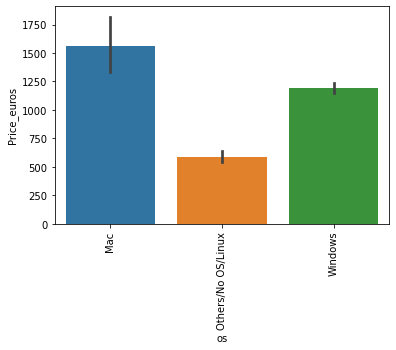

In [77]:
sns.barplot(x=dataset['os'],y=dataset['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()


when you plot price aginst operating system then as usual Mac is most expensive.

C:\Users\najiaha urooj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_euros', ylabel='Density'>

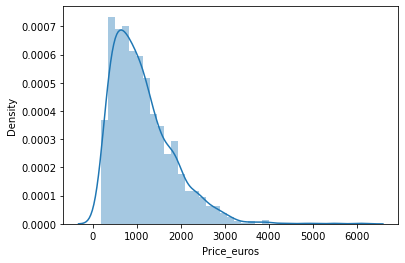

In [78]:
#Distribution of target column
#Working with regression problem statement target column distribution is important to understand.
sns.distplot(dataset['Price_euros'])

In [79]:
# Impact before Logarithmic Transformation
print(dataset.Price_euros.skew())
print(dataset.Price_euros.kurt())

1.519750399431897
4.367186541849804


The distribution of the target variable is skewed and it is obvious that commodities with low prices are sold and purchased more than the branded ones.

# Log-Normal Transformation
we saw the distribution of the target variable above which was right-skewed. By transforming it to normal distribution performance of the algorithm will increase. we take the log of values that transform to the normal distribution which you can observe below. So while separating dependent and independent variables we will take a log of price, and in displaying the result perform exponent of it.

C:\Users\najiaha urooj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


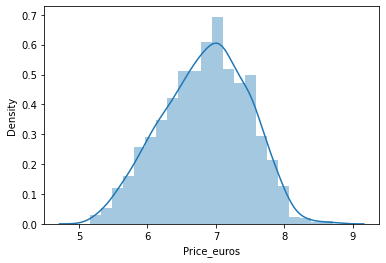

In [80]:
sns.distplot(np.log(dataset['Price_euros']))
plt.show()

In [81]:
# Impact of Logarithmic Transformation
print(np.log(dataset.Price_euros).skew())
print(np.log(dataset.Price_euros).kurt())

-0.17528027569556753
-0.4659420143097819


In [82]:
dataset.head()

,Company,TypeName,Ram,Weight,Price_euros,Touchscreen,IPS,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,os
0,Apple,Ultrabook,8,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [83]:
objectcolumns=dataset.select_dtypes(include=['object'])
numericcolumns=dataset.select_dtypes(include=np.number)

In [84]:
print(objectcolumns.shape)
print(numericcolumns.shape)

(1302, 5)
(1302, 8)


In [85]:
from sklearn.preprocessing import LabelEncoder

In [86]:
le=LabelEncoder()

In [87]:
objectcolsdummy=objectcolumns.apply(le.fit_transform)

In [88]:
objectcolsdummy.shape

(1302, 5)

In [89]:
objectcolsdummy.head()

,Company,TypeName,Cpu_brand,Gpu_brand,os
0,1,4,2,1,0
1,1,4,2,1,0
2,7,3,2,1,1
3,1,4,3,0,0
4,1,4,2,1,0


In [90]:
combinedf=pd.concat([numericcolumns,objectcolsdummy],axis=1)

In [91]:
combinedf.shape

(1302, 13)

In [92]:
combinedf.head()

,Ram,Weight,Price_euros,Touchscreen,IPS,Ppi,HDD,SSD,Company,TypeName,Cpu_brand,Gpu_brand,os
0,8,1.37,1339.69,0,1,226.983005,0,128,1,4,2,1,0
1,8,1.34,898.94,0,0,127.677940,0,0,1,4,2,1,0
2,8,1.86,575.00,0,0,141.211998,0,256,7,3,2,1,1
3,16,1.83,2537.45,0,1,220.534624,0,512,1,4,3,0,0
4,8,1.37,1803.60,0,1,226.983005,0,256,1,4,2,1,0


# Plotting a heat map to visualize the correlation :

Correlation : It is the measure of dependency of one variable on another variable

It is denoted by ' r '
r ranges from -1 to 1
for -ve correlation r = -1
for no correlation r = 0
for positive correlation r=1

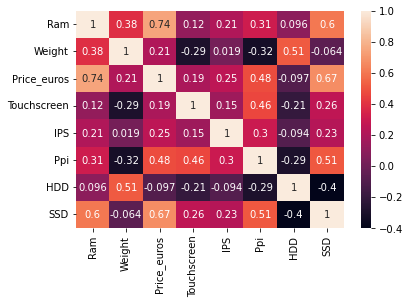

In [93]:
# syntax = sns.heatmap(dataset.corr(),annot=True)
sns.heatmap(numericcolumns.corr(),annot=True)
plt.show()

# Inference from the correlation heat map

* Correlation is Strong for **(r = 0.74)** between  **Price_euros** and **ram** 
they are dependent on each other.

# Split data ito target and dependent variables 

In [94]:
#As discussed we have taken the log of the dependent variables.
#And the training data looks something below the dataframe.

X = combinedf.drop(columns=['Price_euros'])

y  = combinedf.Price_euros

In [95]:
X.shape

(1302, 12)

In [96]:
y.shape

(1302,)

In [97]:
#feature scaling
from sklearn.preprocessing import StandardScaler

In [98]:
sc=StandardScaler()

In [99]:
sc.fit(X)

StandardScaler()

# Linear Regression without Logrithmic transformation

In [100]:
#importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [170]:
lr=LinearRegression()

In [171]:
lrmodel = lr.fit(X,y)

In [172]:
lrmodel.score(X,y)

0.691495569290356

In [173]:
cross_val_score(lr,X,y)

array([0.67415878, 0.70742864, 0.74854501, 0.55265024, 0.62104484])

In [174]:
np.mean([0.67415878, 0.70742864, 0.74854501, 0.55265024, 0.62104484])

0.6607655020000001

In [175]:
lrpredict = lrmodel.predict(X)

In [176]:
lr_residuals = y - lrpredict 

In [177]:
np.sqrt(np.mean(lr_residuals)**2) #RMSE 

1.7201464693670013e-13

# Linear Regression with Logarithmic Transformation

In [178]:
lr_model_log = lr.fit(X,np.log(y))

In [179]:
lr_model_log.score(X,np.log(y))

0.6415365448053716

In [180]:
cross_val_score(lr_model_log,X,y)

array([0.67415878, 0.70742864, 0.74854501, 0.55265024, 0.62104484])

In [181]:
np.mean([0.67415878, 0.70742864, 0.74854501, 0.55265024, 0.62104484])

0.6607655020000001

In [182]:
lrpredict_log = lr_model_log.predict(X)

In [183]:
lrpredict_log = np.exp(lrpredict_log)

In [184]:
lr_residuals_log = y - lrpredict_log 

In [185]:
np.sqrt(np.mean(lr_residuals_log)**2) #RMSE 

21.767558737013644

# Decision Tree withut log

In [186]:
from sklearn.tree import DecisionTreeRegressor

In [187]:
tree = DecisionTreeRegressor(max_depth=2)

In [188]:
treemodel = tree.fit(X,y)

In [189]:
treemodel.score(X,y)

0.5858313903207792

In [190]:
cross_val_score(treemodel,X,y)

array([0.55659766, 0.59255599, 0.65713997, 0.43367757, 0.55102193])

In [191]:
np.mean([0.55659766, 0.59255599, 0.65713997, 0.43367757, 0.55102193])

0.5581986240000001

In [192]:
treemodel_pred = treemodel.predict(X)

In [193]:
treeresiduals = y - treemodel_pred

In [194]:
np.sqrt(np.mean(treeresiduals)**2) #RMSE 

5.837146775491576e-13

# Decision Tree with Log

In [195]:
treemodel_log = tree.fit(X,np.log(y))

In [196]:
treemodel_log.score(X,np.log(y))

0.6491144451540445

In [197]:
cross_val_score(treemodel_log,X,np.log(y))

array([0.55466275, 0.69766702, 0.68755114, 0.46559438, 0.6664946 ])

In [198]:
np.mean([0.55466275, 0.69766702, 0.68755114, 0.46559438, 0.6664946 ])

0.6143939780000001

In [199]:
treemodel_log_pred = treemodel_log.predict(X)

In [200]:
treemodel_log_pred = np.exp(treemodel_log_pred)

In [201]:
treeres_log = y - treemodel_log_pred

In [202]:
np.sqrt(np.mean(treeres_log)**2) #RMSE 

75.08335152160164

# Radomforest without log 

In [203]:
from sklearn.ensemble import RandomForestRegressor

In [204]:
rf = RandomForestRegressor(max_depth=3,n_estimators=10)

In [205]:
rfmodel = rf.fit(X,y)

In [206]:
rfmodel.score(X,y)

0.6929419563953608

In [207]:
cross_val_score(rfmodel,X,y)

array([0.60692559, 0.61316376, 0.73332567, 0.5409614 , 0.61669567])

In [208]:
np.mean([0.60692559, 0.61316376, 0.73332567, 0.5409614 , 0.61669567])

0.622214418

In [209]:
rfpred = rfmodel.predict(X)

In [210]:
rf_residuals = y - rfpred

In [211]:
np.sqrt(np.mean(rf_residuals)**2) #RMSE 

2.30341325193973

# Radomforest with log 

In [212]:
rfmodel_log = rf.fit(X,np.log(y))

In [213]:
rfmodel_log.score(X,np.log(y))

0.7599182329831374

In [214]:
cross_val_score(rfmodel_log,X,np.log(y))

array([0.65838918, 0.78424051, 0.77775459, 0.60730288, 0.75544179])

In [215]:
np.mean([0.65838918, 0.78424051, 0.77775459, 0.60730288, 0.75544179])

0.7166257899999999

In [216]:
rfpred_log = rfmodel_log.predict(X)

In [217]:
rfpred_log = np.exp(rfpred_log)

In [218]:
np.sqrt(np.mean(rfpred_log)**2) #RMSE 

1056.2159350220688

# Gradient boost without log

In [219]:
from sklearn.ensemble import GradientBoostingRegressor

In [220]:
Gb = GradientBoostingRegressor(n_estimators=100,max_depth=2)

In [221]:
Gbmodel = Gb.fit(X,y)

In [222]:
Gbmodel.score(X,y)

0.8375426742768071

In [223]:
cross_val_score(Gbmodel,X,y)

array([0.78657664, 0.80805133, 0.82571377, 0.70671578, 0.72774077])

In [224]:
np.mean([0.78657664, 0.80805133, 0.82571377, 0.70671578, 0.72774077])

0.770959658

In [225]:
Gbpred = Gbmodel.predict(X)

In [226]:
Gb_residuals = y - Gbpred

In [227]:
np.sqrt(np.mean(Gb_residuals)**2) #RMSE 

1.3053903409663284e-14

# Gradient boost with log

In [234]:
Gbmodel_log = Gb.fit(X,np.log(y))

In [235]:
Gbmodel_log.score(X,np.log(y))

0.8759341071030396

In [236]:
cross_val_score(Gbmodel_log,X,np.log(y))

array([0.80025318, 0.88049453, 0.87053658, 0.75177485, 0.84291281])

In [237]:
np.mean([0.80025318, 0.88049453, 0.87053658, 0.75177485, 0.84291281])

0.82919439

In [238]:
Gbpred_log = Gbmodel_log.predict(X)

In [239]:
Gbpred_log = np.exp(Gbpred_log)

In [240]:
np.sqrt(np.mean(Gbpred_log)**2) #RMSE

1084.5709151599006

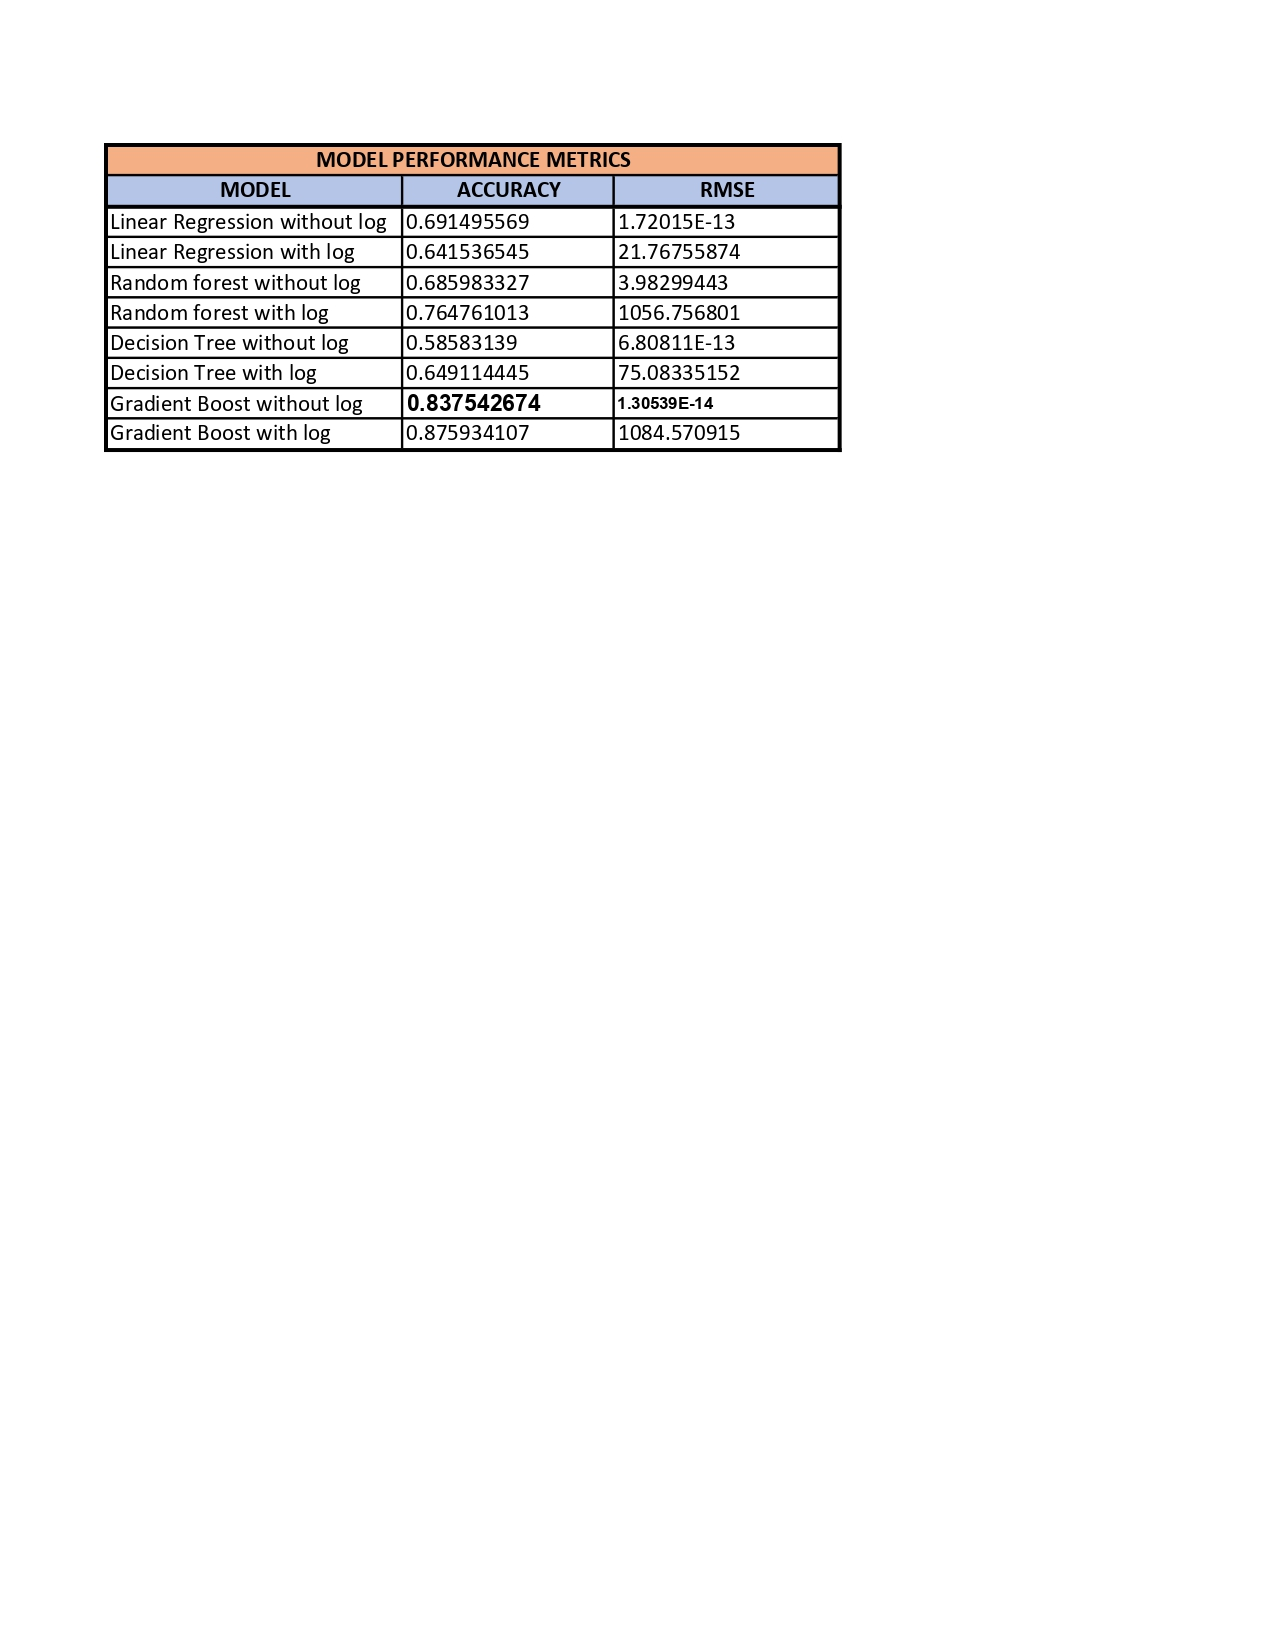

# Conclusion

Gradient Boosting algorithm without Log is the best model 


it gives the best accuracy(0.837542674) 
with root mean square error (1.3053903409663284e-14)